## Ejercicio Time Series Forecast
Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

Para ello, se pide:
1. Carga datos (AirPassengers.csv) y representa la serie. ¿Hay seasonality? ¿Cada cuanto?
2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior. Tienes que usar la función rolling() del DataFrame.
3. Comprueba de manera estadística si la serie es o no stationary.
4. Aplica una transformación logarítmica sobre los datos para mejorar el proceso de transformación de tu time series a stationary. Acuérdate después del forecast de invertir la transformación.
5. Divide en train y test. Guarda 20 muestras para test.
6. Crea tu primer modelo ARIMA. Habrá varias combinaciones en función de sus hiperparámetros... Mide el MAE y RMSE del modelo en predicción. Ten en cuenta el parámetro "m" de la función ARIMA, mediante el cual se establece el seasonality.
7. Representa en una gráfica los datos de test y tus predicciones.
8. Prueba un decission tree y un random forest, a ver qué performance presentan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Carga datos y representa la serie

In [2]:
df = pd.read_csv("data/AirPassengers.csv")
df

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    144 non-null    object
 1   value   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    144 non-null    datetime64[ns]
 1   value   144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
df['date'].dt.freq

'MS'

In [10]:
len(pd.date_range(df['date'].min(), df['date'].max(), freq="MS"))

144

In [11]:
df.set_index("date", inplace=True)

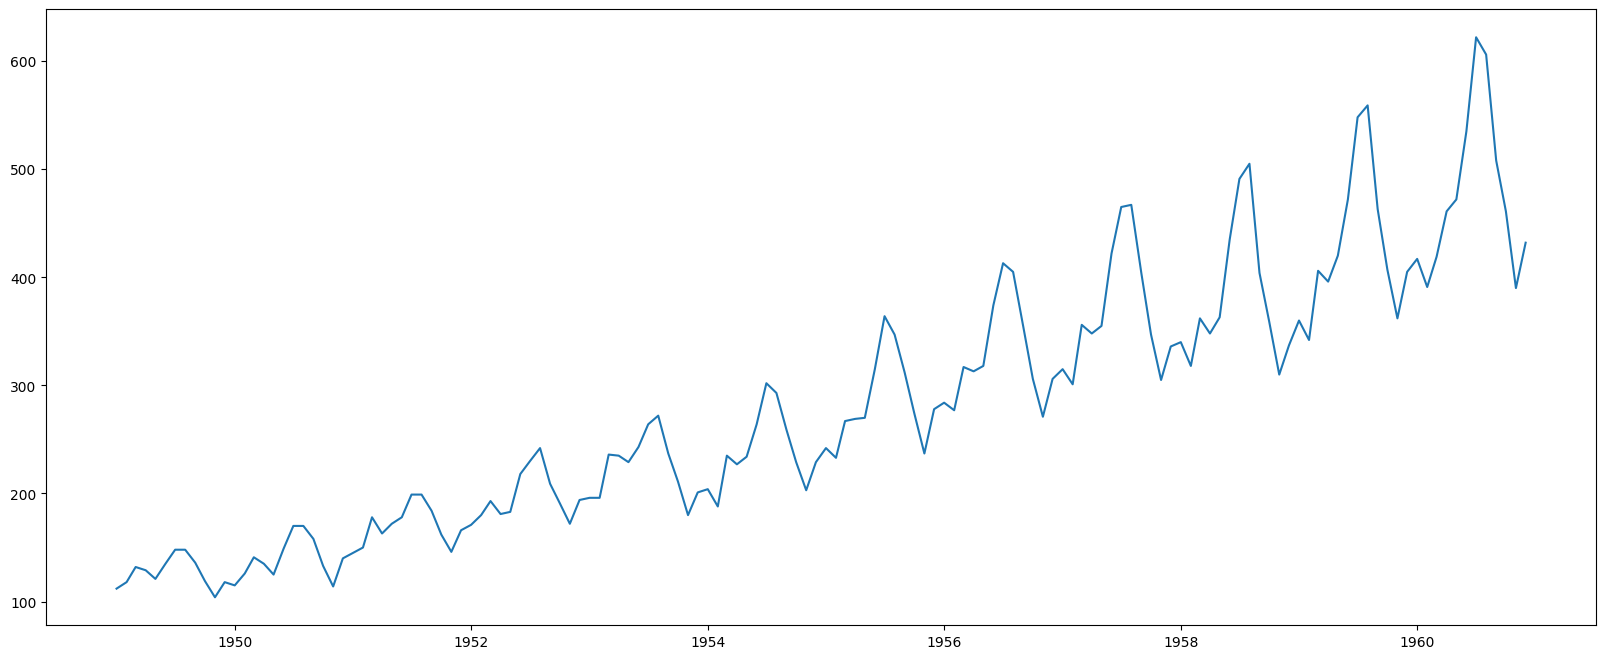

In [12]:
plt.figure(figsize=(20,8))
plt.plot(df)

## 2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window comparando el valor de seasonality obtenido en el apartado anterior

In [19]:
df['MA12'] = df['value'].rolling(12).mean()

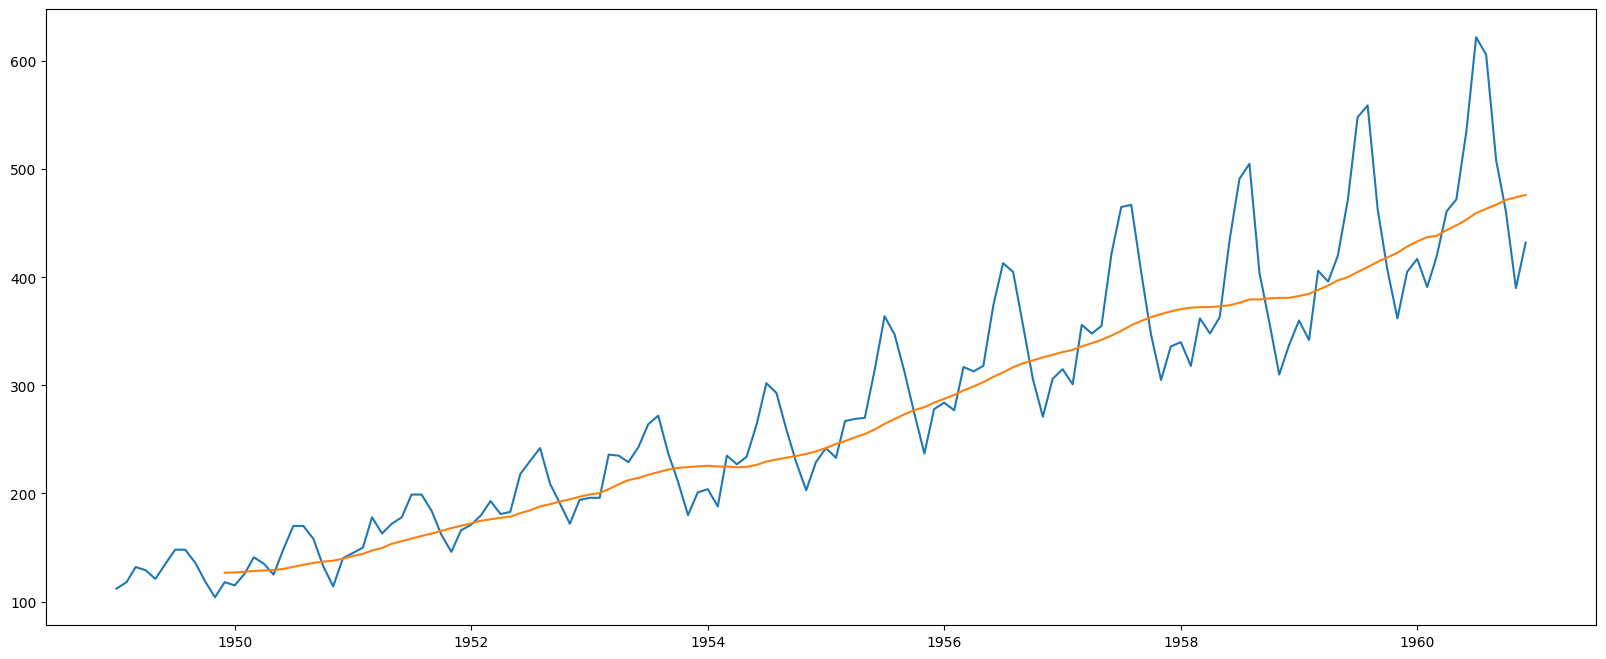

In [20]:
plt.figure(figsize=(20,8))
plt.plot(df)

## 3. Comprueba de manera estadística si la serie es o no stationary.

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
adfuller(df['value'])[1] # No es estacionaria

0.991880243437641

## 4. Aplica una transformación logarítmica

<Axes: >

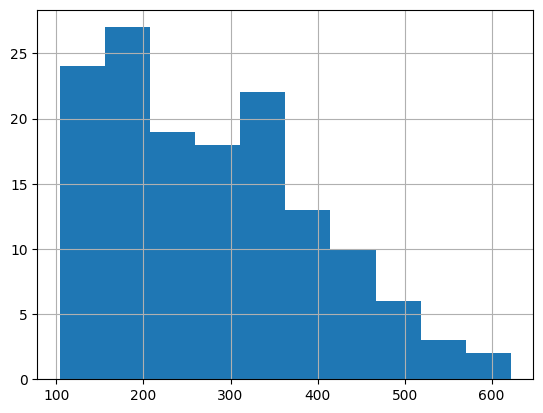

In [24]:
df['value'].hist()

<Axes: >

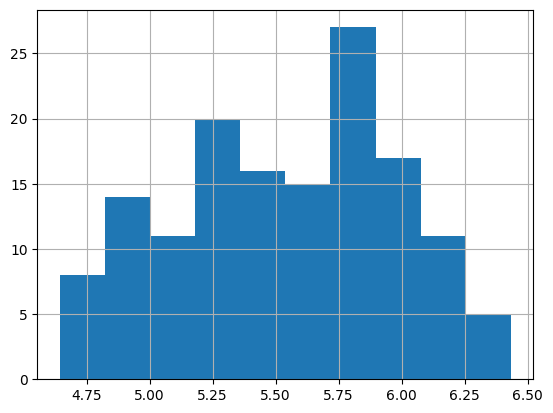

In [25]:
np.log(df['value']).hist()

In [26]:
df['value_log'] = np.log(df['value'])
df

,value,MA12,value_log
date,,,
1949-01-01,112,NaN,4.718499
1949-02-01,118,NaN,4.770685
1949-03-01,132,NaN,4.882802
1949-04-01,129,NaN,4.859812
1949-05-01,121,NaN,4.795791
...,...,...,...
1960-08-01,606,463.333333,6.406880
1960-09-01,508,467.083333,6.230481
1960-10-01,461,471.583333,6.133398


In [ ]:
# ln(112) = 4.72
# e ** 4.72 = 112

In [27]:
2.718 ** 4.72

112.11337210371809

In [28]:
np.exp(4.72)

112.16825266780917

In [30]:
np.exp(df["value_log"])

date
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: value_log, Length: 144, dtype: float64

In [31]:
np.log(0)

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_10020\2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [40]:
np.log(0 + 1)

0.0

In [41]:
np.log1p(0)

0.0

## 5. Divide en train y test. Guarda 20 muestras para test.

In [42]:
y = df[['value_log']]

In [43]:
len(y)

144

In [44]:
train = y.iloc[:-20,]
test = y.iloc[-20:,]

print(train.shape)
print(test.shape)

(124, 1)
(20, 1)


## 6. Crea tu primer modelo ARIMA

In [45]:
from pmdarima.arima import auto_arima

In [46]:
model = auto_arima(train, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-225.739, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-201.351, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-202.849, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-204.251, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-202.180, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-229.563, Time=0.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-227.732, Time=0.35 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-233.725, Time=0.54 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-214.822, Time=0.30 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-232.730, Time=0.68 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-213.443, T

## 7. Representa en una gráfica los datos de test y tus predicciones.

In [49]:
y_pred = model.predict(len(test))
y_pred

1959-05-01    6.039298
1959-06-01    6.098859
1959-07-01    6.099485
1959-08-01    6.130574
1959-09-01    6.115243
1959-10-01    6.122256
1959-11-01    6.118880
1959-12-01    6.126630
1960-01-01    6.137913
1960-02-01    6.150824
1960-03-01    6.165831
1960-04-01    6.178082
1960-05-01    6.189821
1960-06-01    6.199414
1960-07-01    6.208653
1960-08-01    6.217722
1960-09-01    6.227201
1960-10-01    6.237266
1960-11-01    6.247687
1960-12-01    6.258357
Freq: MS, dtype: float64

In [50]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test.values,y_pred)

0.12573473385117678

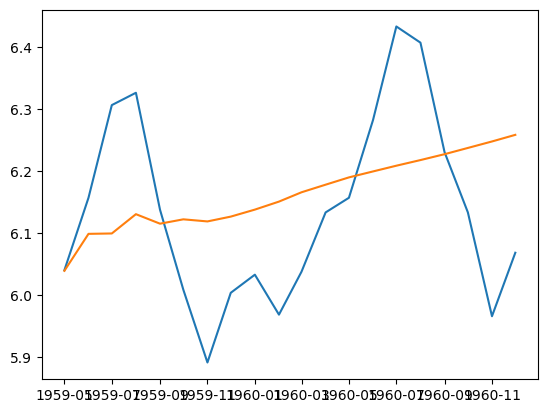

In [51]:
plt.plot(test['value_log'])
plt.plot(y_pred)

In [52]:
model = auto_arima(train, trace=True, m = 12, stationary=False)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-404.047, Time=1.60 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-290.649, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-399.417, Time=1.68 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-353.179, Time=0.60 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-125.472, Time=0.04 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-408.709, Time=2.06 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-382.319, Time=0.71 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-406.712, Time=4.02 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-402.095, Time=2.16 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=-404.699, Time=3.88 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-409.957, Time=1.68 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-382.628, Time=0.38 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-407.392, Time=1.71 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-407.822, Time=3.25 sec
 ARIMA(1,0,2)(1,1,0

0.02690005525936794


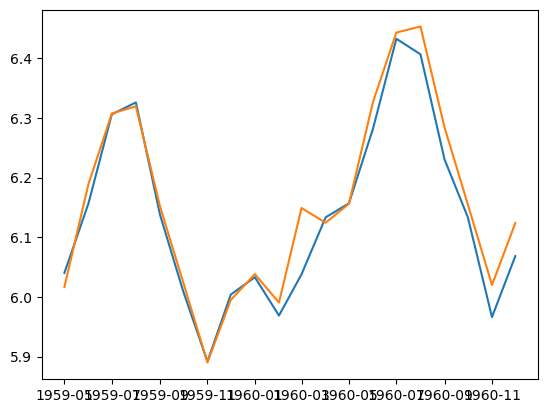

In [53]:
y_pred = model.predict(len(test))
print(mean_absolute_error(test.values,y_pred))
plt.plot(test['value_log'])
plt.plot(y_pred)

In [56]:
# model.predict(100)

In [57]:
y_pred

1959-05-01    6.016563
1959-06-01    6.189504
1959-07-01    6.307669
1959-08-01    6.319560
1959-09-01    6.151748
1959-10-01    6.023712
1959-11-01    5.890053
1959-12-01    5.994869
1960-01-01    6.038158
1960-02-01    5.990504
1960-03-01    6.149126
1960-04-01    6.124412
1960-05-01    6.156210
1960-06-01    6.327160
1960-07-01    6.443321
1960-08-01    6.453521
1960-09-01    6.284205
1960-10-01    6.154853
1960-11-01    6.020037
1960-12-01    6.123837
Freq: MS, dtype: float64

In [55]:
np.exp(y_pred)

1959-05-01    410.166428
1959-06-01    487.604335
1959-07-01    548.764023
1959-08-01    555.328554
1959-09-01    469.537513
1959-10-01    413.109352
1959-11-01    361.424473
1959-12-01    401.364131
1960-01-01    419.120229
1960-02-01    399.615803
1960-03-01    468.308050
1960-04-01    456.876018
1960-05-01    471.637354
1960-06-01    559.565402
1960-07-01    628.490371
1960-08-01    634.933676
1960-09-01    536.037879
1960-10-01    470.997598
1960-11-01    411.593689
1960-12-01    456.613263
Freq: MS, dtype: float64

12.774711184062744


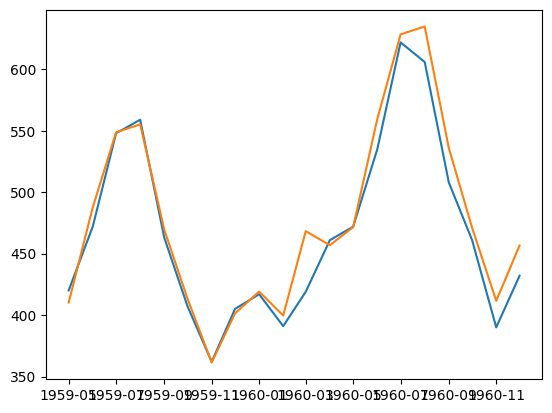

In [59]:
y_pred = model.predict(len(test))
print(mean_absolute_error(np.exp(test.values),np.exp(y_pred)))
plt.plot(np.exp(test['value_log']))
plt.plot(np.exp(y_pred))

## 8. Prueba otros modelos supervisados, a ver qué performance presentan.

In [60]:
for i in range(1,13):
    df['t-'+str(i)] = df['value_log'].shift(i)

df.dropna(inplace=True)
df

,value,MA12,value_log,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12
date,,,,,,,,,,,,,,,
1950-01-01,115,126.916667,4.744932,4.770685,4.644391,4.779123,4.912655,4.997212,4.997212,4.905275,4.795791,4.859812,4.882802,4.770685,4.718499
1950-02-01,126,127.583333,4.836282,4.744932,4.770685,4.644391,4.779123,4.912655,4.997212,4.997212,4.905275,4.795791,4.859812,4.882802,4.770685
1950-03-01,141,128.333333,4.948760,4.836282,4.744932,4.770685,4.644391,4.779123,4.912655,4.997212,4.997212,4.905275,4.795791,4.859812,4.882802
1950-04-01,135,128.833333,4.905275,4.948760,4.836282,4.744932,4.770685,4.644391,4.779123,4.912655,4.997212,4.997212,4.905275,4.795791,4.859812
1950-05-01,125,129.166667,4.828314,4.905275,4.948760,4.836282,4.744932,4.770685,4.644391,4.779123,4.912655,4.997212,4.997212,4.905275,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,463.333333,6.406880,6.432940,6.282267,6.156979,6.133398,6.037871,5.968708,6.033086,6.003887,5.891644,6.008813,6.137727,6.326149
1960-09-01,508,467.083333,6.230481,6.406880,6.432940,6.282267,6.156979,6.133398,6.037871,5.968708,6.033086,6.003887,5.891644,6.008813,6.137727
1960-10-01,461,471.583333,6.133398,6.230481,6.406880,6.432940,6.282267,6.156979,6.133398,6.037871,5.968708,6.033086,6.003887,5.891644,6.008813


In [61]:
X = df.drop(columns=['value', 'value_log'])
y = df['value_log']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 13)
(20, 13)
(112,)
(20,)


0.08192466396024148


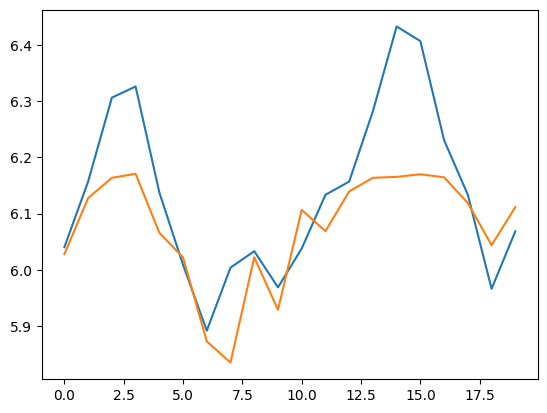

In [64]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(mean_absolute_error(y_test, y_pred))

plt.plot(y_test.values)
plt.plot(y_pred)

In [65]:
X.columns

Index(['MA12', 't-1', 't-2', 't-3', 't-4', 't-5', 't-6', 't-7', 't-8', 't-9',
       't-10', 't-11', 't-12'],
      dtype='object')

In [69]:
np.round(model.feature_importances_, 2)

array([0.04, 0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.89])